## The goal: explore coupling metrics between CAM6 and CLM5 from MOAR simulation. 
Author: Meg D. Fowler <br>
Date:   10 Aug 2020 <br><br>

In [8]:
# Import libraries 
import comet as cm 
import numpy as np 
import xarray as xr 
import pickle
import pandas as pd

# Plotting utils 
import matplotlib.pyplot as plt 
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util


## Read in data

In [1]:
# Set directories and file names 
dailyDir   = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/data/day/'
middleName = '_day_CESM2_amip_r10i1p1f1_gn_'
varNames   = ['hfls','hfss','mrso','mrsos','tas','hurs','ps']

# Set time period portion of fileNames 
# timeName_flx  = ['19500101-19591231','19600101-19691231','19700101-19791231','19800101-19891231', 
#                  '19900101-19991231','20000101-20091231','20100101-20150101']
timeName_flx  = ['19700101-19791231','19800101-19891231', 
                 '19900101-19991231','20000101-20091231','20100101-20150101']

timeName_soil = ['19500101-19991231','20000101-20150101']


In [4]:
# Read in test file to get lat/lon 
fileName = dailyDir+varNames[0]+middleName+timeName_flx[0]+'.nc'
testDF   = xr.open_dataset(fileName, decode_times=True)

# Get lat and lon 
lat = testDF.lat.values
lon = testDF.lon.values 


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'hfls' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [5]:
# Read in surface fluxes along

for iT in range(len(timeName_flx)):

    # --- Compile surface fluxes into singe large arrays in time 

    # Latent heat flux
    lhFile       = dailyDir+varNames[0]+middleName+timeName_flx[iT]+'.nc' # File name
    lhDF         = xr.open_dataset(lhFile,decode_times=True) 
    lhDF['time'] = lhDF.indexes['time'].to_datetimeindex()

    # Sensible heat flux
    shFile       = dailyDir+varNames[1]+middleName+timeName_flx[iT]+'.nc' # File name
    shDF         = xr.open_dataset(shFile,decode_times=True)
    shDF['time'] = shDF.indexes['time'].to_datetimeindex() # Convert from cf time (non-standard calendar) to datetime

#     # --- Compile surface T and RH into large arrays 

#     # Sfc Temp
#     tFile          = dailyDir+varNames[4]+middleName+timeName_flx[iT]+'.nc' # File name
#     TsfcDF         = xr.open_dataset(tFile,decode_times=True) 
#     TsfcDF['time'] = TsfcDF.indexes['time'].to_datetimeindex()

#     # Sfc RH
#     rhFile       = dailyDir+varNames[5]+middleName+timeName_flx[iT]+'.nc' # File name
#     rhDF         = xr.open_dataset(rhFile,decode_times=True)
#     rhDF['time'] = rhDF.indexes['time'].to_datetimeindex() # Convert from cf time (non-standard calendar) to datetime

#     # Sfc pressure
#     psFile       = dailyDir+varNames[6]+'_CFday_CESM2_amip_r10i1p1f1_gn_'+timeName_flx[iT]+'.nc' # File name
#     psDF         = xr.open_dataset(psFile,decode_times=True)
#     psDF['time'] = psDF.indexes['time'].to_datetimeindex() # Convert from cf time (non-standard calendar) to datetime

    if iT==0:
        lhflx_full = lhDF 
        shflx_full = shDF
#         Tsfc_full  = TsfcDF 
#         RHsfc_full = rhDF
#         Psfc_full  = psDF
    else: 
        lhflx_full = xr.concat([lhflx_full, lhDF], dim="time")
        shflx_full = xr.concat([shflx_full, shDF], dim="time")
#         Tsfc_full  = xr.concat([Tsfc_full,  TsfcDF], dim="time")
#         RHsfc_full = xr.concat([RHsfc_full, rhDF],   dim="time")
#         Psfc_full  = xr.concat([Psfc_full,  psDF],   dim="time")

    print('Done with ', timeName_flx[iT])


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.
/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'hfss' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  from ipykernel impor

Done with  19700101-19791231
Done with  19800101-19891231
Done with  19900101-19991231
Done with  20000101-20091231
Done with  20100101-20150101


In [6]:
# Read in soil moisture

for iT in range(len(timeName_soil)):

    # --- Compile surface fluxes into singe large arrays in time 

    # Latent heat flux
    soilFile = dailyDir+varNames[2]+middleName+timeName_soil[iT]+'.nc' # File name
    soilDF   = xr.open_dataset(soilFile,decode_times=True) 
    soilDF['time'] = soilDF.indexes['time'].to_datetimeindex()
    
    # Sensible heat flux
    soil10File = dailyDir+varNames[3]+middleName+timeName_soil[iT]+'.nc' # File name
    soil10DF   = xr.open_dataset(soil10File,decode_times=True)
    soil10DF['time'] = soil10DF.indexes['time'].to_datetimeindex()
    
    if iT==0:
        soilM_full   = soilDF 
        soilM10_full = soil10DF
    else: 
        soilM_full   = xr.concat([soilM_full, soilDF], dim="time")
        soilM10_full = xr.concat([soilM10_full, soil10DF], dim="time")

    print('Done with ', timeName_soil[iT])


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'mrso' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.
/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'mrsos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Converting a CFTimeIndex with da

Done with  19500101-19991231
Done with  20000101-20150101


In [24]:
# Load pressure level of LCL (computed separately in Get_LCLpressure.py and saved as pickle file)
lclPath = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/LCL-pressure_1950-2014.p'
Plcl    = pickle.load( open( lclPath, "rb" ) )


To see if I can get things to run, I limited timeframe to 1970-2015. So limit SM and Plcl: 

In [22]:
# To be able to easily access years, months, days - use Pandas 
dates = pd.DatetimeIndex(soilM10_full['time'].values)

iInclude = np.where(dates.year>=1970)[0]


In [25]:
print('Shape of data before limiting...  ', np.shape(Plcl))
print('Goal to match is shape of SHFLX.. ', np.shape(shflx_full.hfss))

# Limit data
Plcl_sel    = Plcl[iInclude,:,:]
soilM_sel   = np.asarray(soilM_full.mrso)[iInclude,:,:]
soilM10_sel = np.asarray(soilM10_full.mrsos)[iInclude,:,:]

# Check final shape
print()
print('New shape of Plcl...  ', np.shape(Plcl_sel))
print('New shape of SM_10... ', np.shape(soilM10_sel))


Shape of data before limiting...   (23726, 192, 288)
Goal to match is shape of SHFLX..  (16426, 192, 288)

New shape of Plcl...   (16426, 192, 288)
New shape of SM_10...  (16426, 192, 288)


**Quick test to make sure these variables looks reasonable**

Text(0.5, 1.0, 'LHFLX (time mean, 1950-2014)')

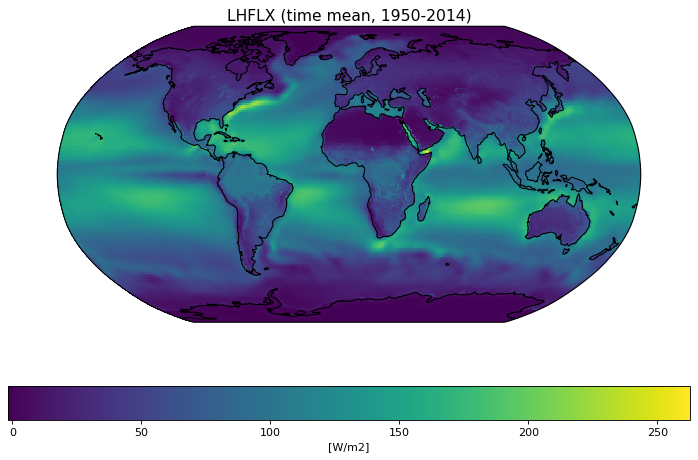

In [7]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
LHavg_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(np.nanmean(lhflx_full.hfls,0)), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,LHavg_cyclic,transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[W/m2]',orientation='horizontal')
ax.set_title('LHFLX (time mean, 1950-2014)', fontsize=14)


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


Text(0.5, 1.0, '10cm Soil Moisture (time mean, 1950-2014)')

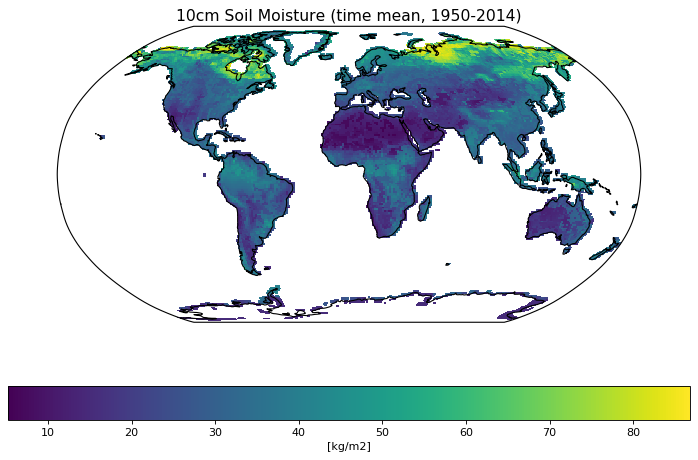

In [56]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
SMavg_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(np.nanmean(soilM10_full.mrsos,0)), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,SMavg_cyclic,transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('10cm Soil Moisture (time mean, 1950-2014)', fontsize=14)


Text(0.5, 1.0, 'Surface Temperature (time mean, 1950-2014)')

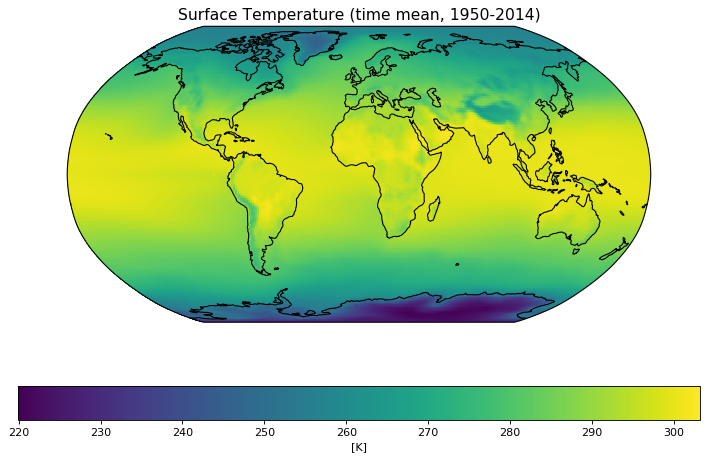

In [8]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
Tsfc_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(np.nanmean(Tsfc_full.tas,0)), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,Tsfc_cyclic,transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[K]',orientation='horizontal')
ax.set_title('Surface Temperature (time mean, 1950-2014)', fontsize=14)


## Coupling metrics

### Terrestrial coupling index

In [69]:
# Combine two variables into single dataset 
TS = lhflx_full.assign({'mrsos': (('time','lat','lon'), soilM10_full['mrsos'])})


In [73]:
terra_coupling = cm.metrics.CouplingIndex()
terra_coupling = terra_coupling.compute(TS, xname='mrsos',yname='hfls',averaging='season')

/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [74]:
terra_coupling

<xarray.Dataset>
Dimensions:        (lat: 192, lon: 288, season: 4)
Coordinates:
  * lat            (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon            (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * season         (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    mrsos_hfls_CI  (season, lat, lon) float64 nan nan nan nan ... nan nan nan

Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [DJF]')

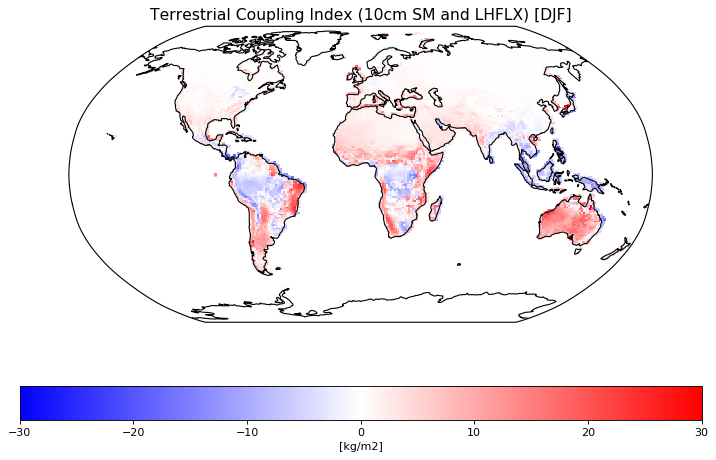

In [81]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_DJF, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[0,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_DJF,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[0]+']', fontsize=14)


Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [JJA]')

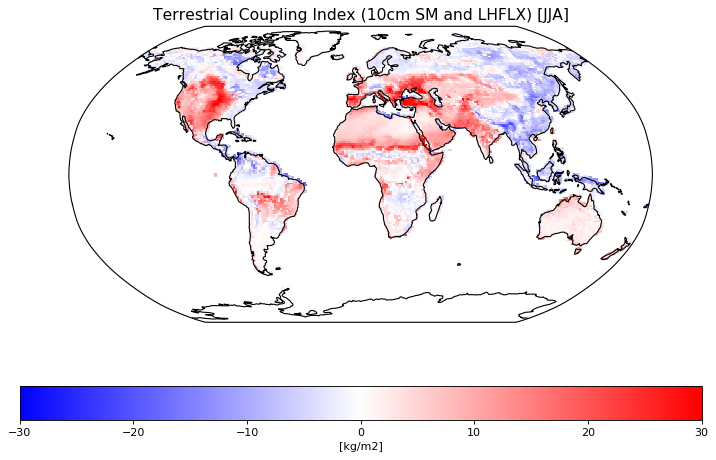

In [89]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_JJA, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[1,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_JJA,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[1]+']', fontsize=14)



Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [MAM]')

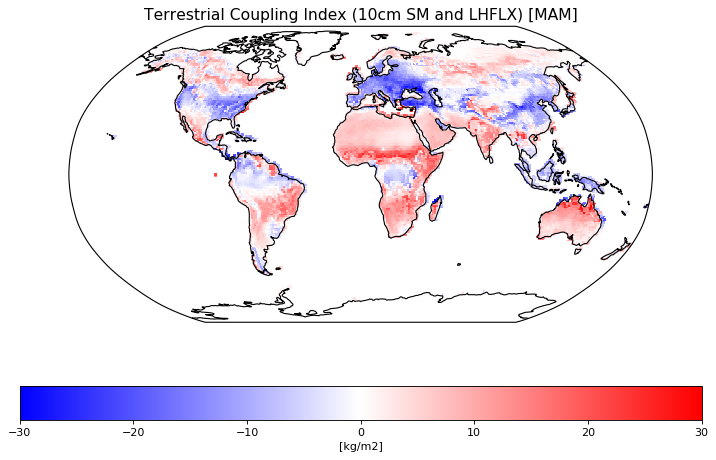

In [91]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_MAM, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[2,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_MAM,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[2]+']', fontsize=14)



Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [SON]')

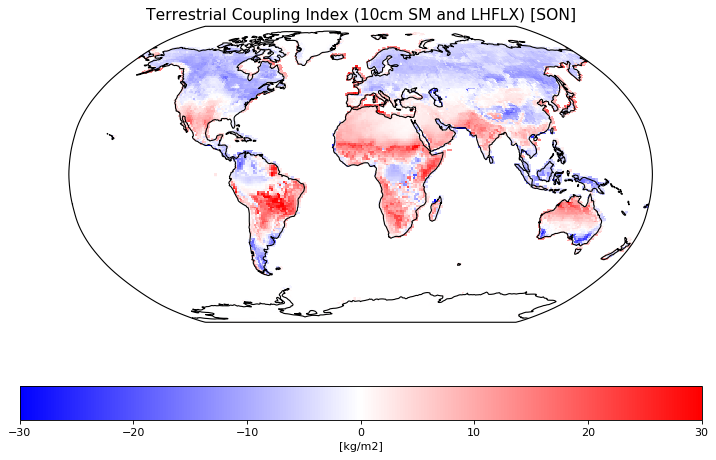

In [92]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_SON, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[3,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_SON,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[3]+']', fontsize=14)


### Atmospheric leg of the coupling index
Following the path outlined in Dirmeyer et al. (2014), we can use RH and T to get the dewpoint temperature, which can then be used along with PS and T to get the pressure level of the LCL. The authors note that this is highly correlated with the height of the boundary layer. The coupling between that pressure level and the sensible heat flux (and SM with SHFLX) can give an idea of the full L-A coupling in a region.<br><br>
The dew point is computed following the Magnus formula, as outlined in Eq (3)- Eq (8) of Lawrence et al. (2005; BAMS). 
<br><br>
<b>Note:</b> When attempting to carry out above steps in Jupyter Notebook, kernal kept dying when ~85% of the way through computing Plcl. So moved to separate python script: Get_LCLpressure.py. <br>

In [7]:
# --- Compute coupling index between soil moisture and sensible heat flux (terrestrial leg) --- # 

# Combine variables into single dataset 
dH_dW   = shflx_full.assign({'mrsos': (('time','lat','lon'), soilM10_sel['mrsos'])})  # SM & SHFLX

# Compute coupling index 
terraLeg_coupling = cm.metrics.CouplingIndex()
terraLeg_coupling = terraLeg_coupling.compute(dH_dW, xname='mrsos',yname='hfss',averaging='season')

# Save to netCDF file
terraLeg_coupling.to_netcdf('/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/TerraLeg_coupling_shf_vs_soilm_1970-2015.nc')


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [10]:
# Free up some memory (can re-load from netCDF)
del terraLeg_coupling 
del dH_dW

In [27]:
# --- Compute coupling index between sensible heat flux and pressure level of LCL (atmospheric leg) --- #

# Combine variables into single dataset 
dLCL_dH = shflx_full.assign({'Plcl': (('time','lat','lon'), Plcl_sel)})                    # P_LCL & SHFLX
dLCL_dH

# Compute coupling index 
atmoLeg_coupling = cm.metrics.CouplingIndex()
atmoLeg_coupling = atmoLeg_coupling.compute(dLCL_dH, xname='hfss',yname='Plcl',averaging='season')

# Save to netCDF file 
atmoLeg_coupling.to_netcdf('/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/AtmoLeg_coupling_Plcl_vs_shf_1970-2015.nc')


In [28]:
# Free up some memory (can re-load from netCDF)
del atmoLeg_coupling 
del dLCL_dH


In [9]:
# Compute sensitivity in total pathway (option 1: connection between SM and LCL pressure)

# Combine variables into single dataset 
dH_dW   = shflx_full.assign({'mrsos': (('time','lat','lon'), soilM10_sel['mrsos'])})  # SM & SHFLX
#dLCL_dW = dH_dW.assign({'Plcl': (('time','lat','lon'), Plcl)})                  # SM & P_LCL

# Compute coupling index 
totalSensitivity = cm.metrics.CouplingIndex()
totalSensitivity = totalSensitivity.compute(dLCL_dH, xname='hfss',yname='Plcl',averaging='season')

# Save to netCDF file 
totalSensitivity.to_netcdf('/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/TotalPathway_coupling_Plcl_vs_soilm.nc')


(23726, 192, 288)

Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and SHFLX) [JJA]')

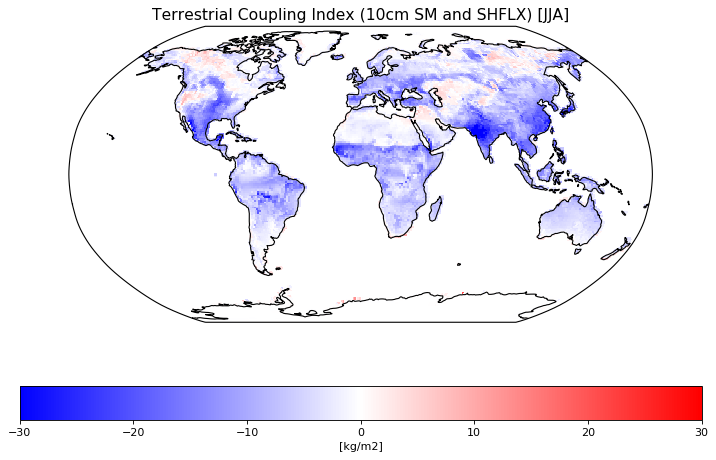

In [9]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_JJA, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terraLeg_coupling.mrsos_hfss_CI[1,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_JJA,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and SHFLX) ['+np.asarray(terraLeg_coupling.season)[1]+']', fontsize=14)


In [ ]:
# But that total pathway sensitvity should be the product of terraLeg_coupling and atmoLeg_coupling. Is it the same?
totalSensitivity_test = terraLeg_coupling.mrsos_hfss_CI * atmoLeg_coupling.hfss_Plcl_CI


In [14]:
print(cm.list_metrics)

['CouplingIndex', 'MixingDiagram', 'HeatCond', 'ConvTrig', 'RHTend', 'SoilMemory']


## Testing section
